# Retrievals with a Dataset Offsets - WIP 

This is a slightly modified version of the 'basic retrieval' tutorial, but with the offsets included in V1.2
To be merged with the current offset retrieval

In [1]:
from POSEIDON.core import create_star, create_planet
from POSEIDON.constants import R_Sun, R_J

#***** Define stellar properties *****#

R_s = 1.155*R_Sun     # Stellar radius (m)
T_s = 6071.0          # Stellar effective temperature (K)
Met_s = 0.0           # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 4.38        # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s)

#***** Define planet properties *****#

planet_name = 'WASP-999b'  # Planet name used for plots, output files etc.

R_p = 1.359*R_J     # Planetary radius (m)
g_p = 9.186         # Gravitational field of planet (m/s^2)
T_eq = 1400.0       # Equilibrium temperature (K)

# Create the planet object
planet = create_planet(planet_name, R_p, gravity = g_p, T_eq = T_eq)

/Users/elijahmullens/Desktop/POSEIDON-V1-1/POSEIDON/absorption.py:1493: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def store_Rayleigh_eta_LBL(wl_model, chemical_species):


## Configuring multiple offsets

In [2]:
from POSEIDON.core import load_data, wl_grid_constant_R

#***** Model wavelength grid *****#

wl_min = 0.4      # Minimum wavelength (um)
wl_max = 1.8      # Maximum wavelength (um)
R = 4000          # Spectral resolution of grid      

# We need to provide a model wavelength grid to initialise instrument properties
wl = wl_grid_constant_R(wl_min, wl_max, R)

#***** Specify data location and instruments  *****#

data_dir = '../../../../POSEIDON/reference_data/observations/WASP-999b'  # Special directory for this tutorial

# Specify the STIS and new WFC3 Hubble data                
datasets = ['WASP-999b_STIS_G430.dat', 
            'WASP-999b_STIS_G750.dat', 
            'WASP-999b_WFC3_G141_OFFSET.dat']  
instruments = ['STIS_G430', 'STIS_G750', 'WFC3_G141']

# Load dataset, pre-load instrument PSF and transmission function
data_offset_wfc3 = load_data(data_dir, datasets, instruments, wl, 
                            offset_1_datasets = ['WASP-999b_WFC3_G141_OFFSET.dat'])

data_offset_stis = load_data(data_dir, datasets, instruments, wl, 
                            offset_1_datasets = ['WASP-999b_STIS_G430.dat','WASP-999b_STIS_G750.dat'])

data_three_offsets = load_data(data_dir, datasets, instruments, wl, 
                            offset_1_datasets = ['WASP-999b_STIS_G430.dat'],
                            offset_2_datasets = ['WASP-999b_STIS_G750.dat'],
                            offset_3_datasets = ['WASP-999b_WFC3_G141_OFFSET.dat'])

data_two_offsets  = load_data(data_dir, datasets, instruments, wl, 
                            offset_1_datasets = ['WASP-999b_STIS_G430.dat','WASP-999b_STIS_G750.dat'],
                            offset_2_datasets = ['WASP-999b_WFC3_G141_OFFSET.dat'])

### Configuring a Retrieval with a Free Offset(s)

We'll define here the 'right' model I used to generate the simulated Hubble data, but also add a single free offset.

In [3]:
from POSEIDON.core import define_model

#***** Define model *****#

model_name_offset_wfc3 = 'Retrieval_with_single_offset_wfc3'  # Model name used for plots, output files etc.

bulk_species = ['H2', 'He']         # H2 + He comprises the bulk atmosphere
param_species = ['Na', 'K', 'H2O']

# Create the model object
model_offset_wfc3 = define_model(model_name_offset_wfc3, bulk_species, param_species, 
                     PT_profile = 'isotherm', cloud_model = 'cloud-free',
                     offsets_applied = 'single_dataset')

# Check the free parameters defining this model
print("Free parameters: " + str(model_offset_wfc3['param_names']))

model_name_offset_stis = 'Retrieval_with_single_offset_stis'  # Model name used for plots, output files etc.

bulk_species = ['H2', 'He']         # H2 + He comprises the bulk atmosphere
param_species = ['Na', 'K', 'H2O']

# Create the model object
model_offset_stis = define_model(model_name_offset_stis, bulk_species, param_species, 
                     PT_profile = 'isotherm', cloud_model = 'cloud-free',
                     offsets_applied = 'single_dataset')

# Check the free parameters defining this model
print("Free parameters: " + str(model_offset_stis['param_names']))


model_name_three_offsets = 'Retrieval_with_three_offsets'  # Model name used for plots, output files etc.

bulk_species = ['H2', 'He']         # H2 + He comprises the bulk atmosphere
param_species = ['Na', 'K', 'H2O']

# Create the model object
model_three_offsets = define_model(model_name_three_offsets, bulk_species, param_species, 
                     PT_profile = 'isotherm', cloud_model = 'cloud-free',
                     offsets_applied = 'three_datasets')

# Check the free parameters defining this model
print("Free parameters: " + str(model_three_offsets['param_names']))


model_name_two_offsets = 'Retrieval_with_two_offsets'  # Model name used for plots, output files etc.

bulk_species = ['H2', 'He']         # H2 + He comprises the bulk atmosphere
param_species = ['Na', 'K', 'H2O']

# Create the model object
model_two_offsets = define_model(model_name_two_offsets, bulk_species, param_species, 
                     PT_profile = 'isotherm', cloud_model = 'cloud-free',
                     offsets_applied = 'two_datasets')

# Check the free parameters defining this model
print("Free parameters: " + str(model_two_offsets['param_names']))

Free parameters: ['R_p_ref' 'T' 'log_Na' 'log_K' 'log_H2O' 'delta_rel']
Free parameters: ['R_p_ref' 'T' 'log_Na' 'log_K' 'log_H2O' 'delta_rel']
Free parameters: ['R_p_ref' 'T' 'log_Na' 'log_K' 'log_H2O' 'delta_rel_1' 'delta_rel_2'
 'delta_rel_3']
Free parameters: ['R_p_ref' 'T' 'log_Na' 'log_K' 'log_H2O' 'delta_rel_1' 'delta_rel_2']


#### WFC3 Offset 

In [4]:
from POSEIDON.core import set_priors

#***** Set priors for retrieval *****#

# Initialise prior type dictionary
prior_types = {}

# Specify whether priors are linear, Gaussian, etc.
prior_types['T'] = 'uniform'
prior_types['R_p_ref'] = 'uniform'
prior_types['log_H2O'] = 'uniform'
prior_types['delta_rel'] = 'uniform'

# Initialise prior range dictionary
prior_ranges = {}

# Specify prior ranges for each free parameter
prior_ranges['T'] = [400, 1600]
prior_ranges['R_p_ref'] = [0.85*R_p, 1.15*R_p]
prior_ranges['log_H2O'] = [-12, -1]
prior_ranges['delta_rel'] = [-1000, 1000]   # Offset units are in parts per million, so this is -1000 ppm to +1000 ppm

# Create prior object for retrieval
priors = set_priors(planet, star, model_offset_wfc3, data_offset_wfc3, prior_types, prior_ranges)

In [5]:
from POSEIDON.core import read_opacities
import numpy as np

#***** Read opacity data *****#

opacity_treatment = 'opacity_sampling'

# Define fine temperature grid (K)
T_fine_min = 400     # Same as prior range for T
T_fine_max = 1600    # Same as prior range for T
T_fine_step = 10     # 10 K steps are a good tradeoff between accuracy and RAM

T_fine = np.arange(T_fine_min, (T_fine_max + T_fine_step), T_fine_step)

# Define fine pressure grid (log10(P/bar))
log_P_fine_min = -6.0   # 1 ubar is the lowest pressure in the opacity database
log_P_fine_max = 2.0    # 100 bar is the highest pressure in the opacity database
log_P_fine_step = 0.2   # 0.2 dex steps are a good tradeoff between accuracy and RAM

log_P_fine = np.arange(log_P_fine_min, (log_P_fine_max + log_P_fine_step), 
                       log_P_fine_step)

# Pre-interpolate the opacities
opac = read_opacities(model_offset_wfc3, wl, opacity_treatment, T_fine, log_P_fine)

Reading in cross sections in opacity sampling mode...
H2-H2 done
H2-He done
Na done
K done
H2O done
Opacity pre-interpolation complete.


In [6]:
from POSEIDON.retrieval import run_retrieval

#***** Specify fixed atmospheric settings for retrieval *****#

# Atmospheric pressure grid
P_min = 1.0e-7    # 0.1 ubar
P_max = 100       # 100 bar
N_layers = 100    # 100 layers

# Let's space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure
P_ref = 10.0   # Retrieved R_p_ref parameter will be the radius at 10 bar

#***** Run atmospheric retrieval *****#

run_retrieval(planet, star, model_offset_wfc3, opac, data_offset_wfc3, priors, wl, P, P_ref, R = R, 
              spectrum_type = 'transmission', sampling_algorithm = 'MultiNest', 
              N_live = 100, verbose = True)


POSEIDON now running 'Retrieval_with_single_offset_wfc3'
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  100
 dimensionality =    6
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.931677
Replacements:                                150
Total Samples:                               161
Nested Sampling ln(Z):             -52850.958774
Acceptance Rate:                        0.781250
Replacements:                                200
Total Samples:                               256
Nested Sampling ln(Z):             -15493.445763
Acceptance Rate:                        0.728863
Replacements:                                250
Total Samples:                               343
Nested Sampling ln(Z):              -4964.717209
Acceptance Rate:                   

Generating corner plot ...


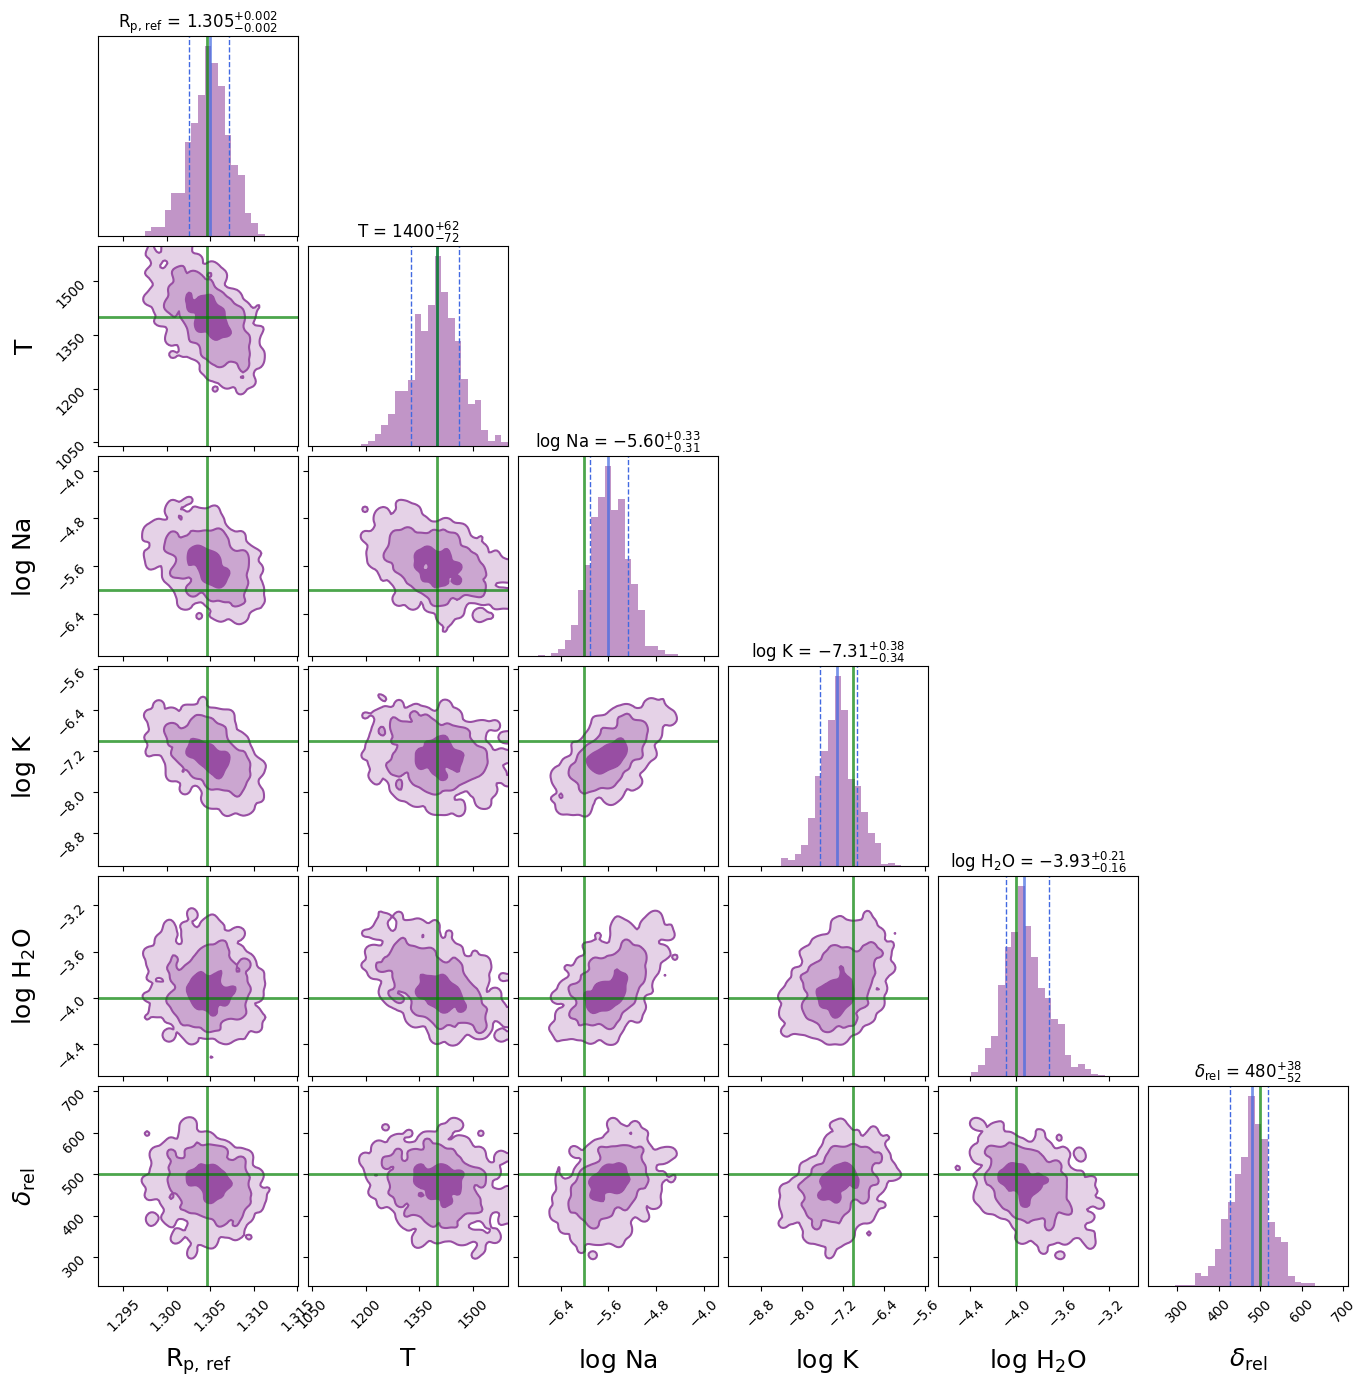

In [7]:
from POSEIDON.corner import generate_cornerplot

#***** Make corner plot *****#

fig_corner = generate_cornerplot(planet, model_offset_wfc3, 
                                 true_vals = [0.96*(R_p/R_J), 1400, -6.0, -7.0, -4.0, 500])   # The last parameter is the offset

Time to plot the retrieved spectrum.

Applied 479.47 ppm offset to offset_1_datasets


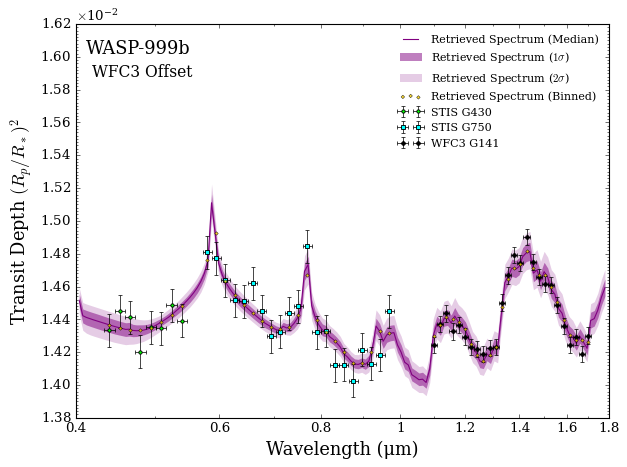

In [7]:
from POSEIDON.utility import read_retrieved_spectrum, plot_collection
from POSEIDON.visuals import plot_spectra_retrieved

#***** Plot retrieved transmission spectrum *****#

# Read retrieved spectrum confidence regions
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_offset_wfc3)

# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = [])
spectra_low1 = plot_collection(spec_low1, wl, collection = []) 
spectra_low2 = plot_collection(spec_low2, wl, collection = []) 
spectra_high1 = plot_collection(spec_high1, wl, collection = []) 
spectra_high2 = plot_collection(spec_high2, wl, collection = [])

# Produce figure
fig_spec = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                                  spectra_high1, spectra_high2, planet_name,
                                  data_offset_wfc3, R_to_bin = 100,
                                  plt_label = 'WFC3 Offset',
                                  data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                                  data_colour_list = ['lime', 'cyan', 'black'],
                                  model = model_offset_wfc3, add_retrieved_offsets = True,
                                  )

### Combined STIS offset

In [9]:
from POSEIDON.core import set_priors

#***** Set priors for retrieval *****#

# Initialise prior type dictionary
prior_types = {}

# Specify whether priors are linear, Gaussian, etc.
prior_types['T'] = 'uniform'
prior_types['R_p_ref'] = 'uniform'
prior_types['log_H2O'] = 'uniform'
prior_types['delta_rel'] = 'uniform'

# Initialise prior range dictionary
prior_ranges = {}

# Specify prior ranges for each free parameter
prior_ranges['T'] = [400, 1600]
prior_ranges['R_p_ref'] = [0.85*R_p, 1.15*R_p]
prior_ranges['log_H2O'] = [-12, -1]
prior_ranges['delta_rel'] = [-1000, 1000]   # Offset units are in parts per million, so this is -1000 ppm to +1000 ppm

# Create prior object for retrieval
priors = set_priors(planet, star, model_offset_stis, data_offset_stis, prior_types, prior_ranges)

In [10]:
from POSEIDON.retrieval import run_retrieval

#***** Specify fixed atmospheric settings for retrieval *****#

# Atmospheric pressure grid
P_min = 1.0e-7    # 0.1 ubar
P_max = 100       # 100 bar
N_layers = 100    # 100 layers

# Let's space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure
P_ref = 10.0   # Retrieved R_p_ref parameter will be the radius at 10 bar

#***** Run atmospheric retrieval *****#

run_retrieval(planet, star, model_offset_stis, opac, data_offset_stis, priors, wl, P, P_ref, R = R, 
              spectrum_type = 'transmission', sampling_algorithm = 'MultiNest', 
              N_live = 100, verbose = True)

POSEIDON now running 'Retrieval_with_single_offset_stis'
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  100
 dimensionality =    6
 *****************************************************
 Starting MultiNest
 generating live points
 live points generated, starting sampling
Acceptance Rate:                        0.892857
Replacements:                                150
Total Samples:                               168
Nested Sampling ln(Z):             -55097.456407
Acceptance Rate:                        0.796813
Replacements:                                200
Total Samples:                               251
Nested Sampling ln(Z):             -23161.283955
Acceptance Rate:                        0.605327
Replacements:                                250
Total Samples:                               413
Nested Sampling ln(Z):              -9372.434175
Acceptance Rate:                   

Applied -497.73 ppm offset to offset_1_datasets


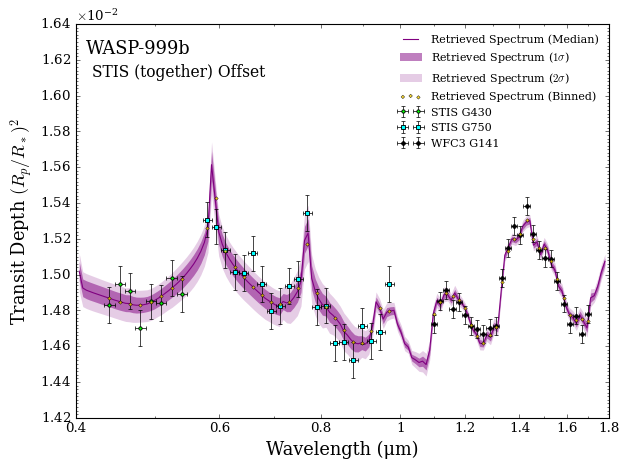

In [11]:
from POSEIDON.utility import read_retrieved_spectrum, plot_collection
from POSEIDON.visuals import plot_spectra_retrieved

#***** Plot retrieved transmission spectrum *****#

# Read retrieved spectrum confidence regions
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_offset_stis)

# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = [])
spectra_low1 = plot_collection(spec_low1, wl, collection = []) 
spectra_low2 = plot_collection(spec_low2, wl, collection = []) 
spectra_high1 = plot_collection(spec_high1, wl, collection = []) 
spectra_high2 = plot_collection(spec_high2, wl, collection = [])

# Produce figure
fig_spec = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                                  spectra_high1, spectra_high2, planet_name,
                                  data_offset_stis, R_to_bin = 100,
                                  plt_label = 'STIS (together) Offset',
                                  data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                                  data_colour_list = ['lime', 'cyan', 'black'],
                                  model = model_offset_stis, add_retrieved_offsets = True,
                                  )

### Three Offsets

In [13]:
from POSEIDON.core import set_priors

#***** Set priors for retrieval *****#

# Initialise prior type dictionary
prior_types = {}

# Specify whether priors are linear, Gaussian, etc.
prior_types['T'] = 'uniform'
prior_types['R_p_ref'] = 'uniform'
prior_types['log_H2O'] = 'uniform'
prior_types['delta_rel_1'] = 'uniform'
prior_types['delta_rel_2'] = 'uniform'
prior_types['delta_rel_3'] = 'uniform'

# Initialise prior range dictionary
prior_ranges = {}

# Specify prior ranges for each free parameter
prior_ranges['T'] = [400, 1600]
prior_ranges['R_p_ref'] = [0.85*R_p, 1.15*R_p]
prior_ranges['log_H2O'] = [-12, -1]
prior_ranges['delta_rel_1'] = [-1000, 1000]   # Offset units are in parts per million, so this is -1000 ppm to +1000 ppm
prior_ranges['delta_rel_2'] = [-1000, 1000]
prior_ranges['delta_rel_3'] = [-1000, 1000]

# Create prior object for retrieval
priors = set_priors(planet, star, model_three_offsets, data_three_offsets, prior_types, prior_ranges)

In [14]:
from POSEIDON.retrieval import run_retrieval

#***** Specify fixed atmospheric settings for retrieval *****#

# Atmospheric pressure grid
P_min = 1.0e-7    # 0.1 ubar
P_max = 100       # 100 bar
N_layers = 100    # 100 layers

# Let's space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure
P_ref = 10.0   # Retrieved R_p_ref parameter will be the radius at 10 bar

#***** Run atmospheric retrieval *****#

run_retrieval(planet, star, model_three_offsets, opac, data_three_offsets, priors, wl, P, P_ref, R = R, 
              spectrum_type = 'transmission', sampling_algorithm = 'MultiNest', 
              N_live = 100, verbose = False)

POSEIDON now running 'Retrieval_with_three_offsets'
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  100
 dimensionality =    8
 *****************************************************
POSEIDON retrieval finished in 0.1 hours ln(ev)=   430.47229277872276      +/-  0.42973483246965855     
 Total Likelihood Evaluations:        11058
 Sampling finished. Exiting MultiNest

Now generating 723 sampled spectra and P-T profiles from the posterior distribution...
This process will take approximately 0.5 minutes
All done! Output files can be found in ./POSEIDON_output/WASP-999b/retrievals/results/


Applied -610.16 ppm offset to offset_1_datasets
Applied -584.04 ppm offset to offset_2_datasets
Applied -97.04 ppm offset to offset_3_datasets


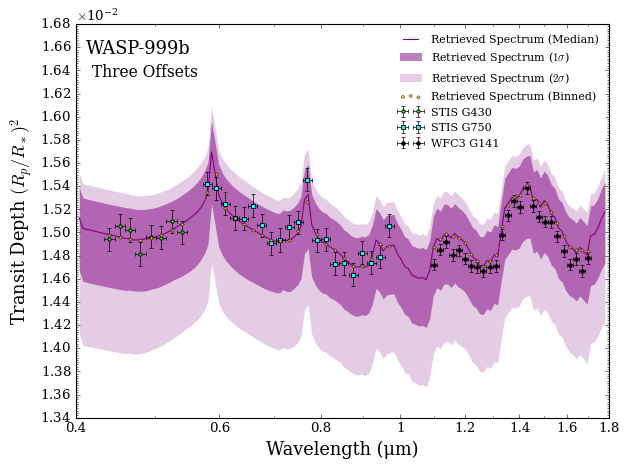

In [9]:
from POSEIDON.utility import read_retrieved_spectrum, plot_collection
from POSEIDON.visuals import plot_spectra_retrieved

#***** Plot retrieved transmission spectrum *****#

# Read retrieved spectrum confidence regions
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_three_offsets)

# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = [])
spectra_low1 = plot_collection(spec_low1, wl, collection = []) 
spectra_low2 = plot_collection(spec_low2, wl, collection = []) 
spectra_high1 = plot_collection(spec_high1, wl, collection = []) 
spectra_high2 = plot_collection(spec_high2, wl, collection = [])

# Produce figure
fig_spec = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                                  spectra_high1, spectra_high2, planet_name,
                                  data_offset_stis, R_to_bin = 100,
                                  plt_label = 'Three Offsets',
                                  data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                                  data_colour_list = ['lime', 'cyan', 'black'],
                                  model = model_three_offsets, add_retrieved_offsets = True,
                                  )

### Two Offsets

In [19]:
from POSEIDON.core import set_priors

#***** Set priors for retrieval *****#

# Initialise prior type dictionary
prior_types = {}

# Specify whether priors are linear, Gaussian, etc.
prior_types['T'] = 'uniform'
prior_types['R_p_ref'] = 'uniform'
prior_types['log_H2O'] = 'uniform'
prior_types['delta_rel_1'] = 'uniform'
prior_types['delta_rel_2'] = 'uniform'

# Initialise prior range dictionary
prior_ranges = {}

# Specify prior ranges for each free parameter
prior_ranges['T'] = [400, 1600]
prior_ranges['R_p_ref'] = [0.85*R_p, 1.15*R_p]
prior_ranges['log_H2O'] = [-12, -1]
prior_ranges['delta_rel_1'] = [-1000, 1000]   # Offset units are in parts per million, so this is -1000 ppm to +1000 ppm
prior_ranges['delta_rel_2'] = [-1000, 1000]

# Create prior object for retrieval
priors = set_priors(planet, star, model_two_offsets, data_two_offsets, prior_types, prior_ranges)

In [20]:
from POSEIDON.retrieval import run_retrieval

#***** Specify fixed atmospheric settings for retrieval *****#

# Atmospheric pressure grid
P_min = 1.0e-7    # 0.1 ubar
P_max = 100       # 100 bar
N_layers = 100    # 100 layers

# Let's space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure
P_ref = 10.0   # Retrieved R_p_ref parameter will be the radius at 10 bar

#***** Run atmospheric retrieval *****#

run_retrieval(planet, star, model_two_offsets, opac, data_two_offsets, priors, wl, P, P_ref, R = R, 
              spectrum_type = 'transmission', sampling_algorithm = 'MultiNest', 
              N_live = 100, verbose = False)

POSEIDON now running 'Retrieval_with_two_offsets'
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  100
 dimensionality =    7
 *****************************************************
POSEIDON retrieval finished in 0.079 hours ln(ev)=   432.65825482898845      +/-  0.41222036771041809     
 Total Likelihood Evaluations:         7539
 Sampling finished. Exiting MultiNest

Now generating 635 sampled spectra and P-T profiles from the posterior distribution...
This process will take approximately 0.45 minutes
All done! Output files can be found in ./POSEIDON_output/WASP-999b/retrievals/results/


Applied -600.49 ppm offset to offset_1_datasets
Applied -98.3 ppm offset to offset_2_datasets


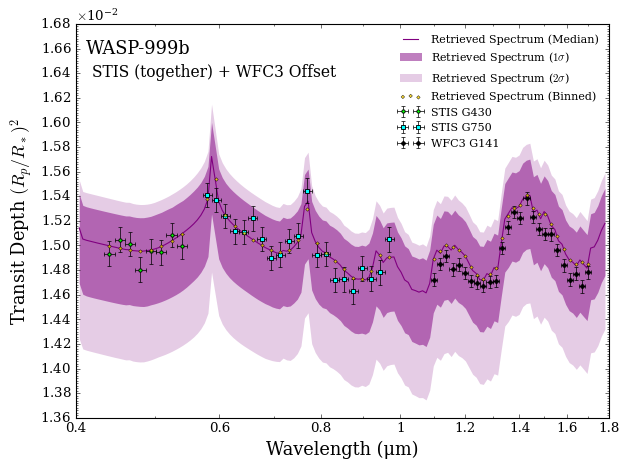

In [10]:
from POSEIDON.utility import read_retrieved_spectrum, plot_collection
from POSEIDON.visuals import plot_spectra_retrieved

#***** Plot retrieved transmission spectrum *****#

# Read retrieved spectrum confidence regions
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_two_offsets)

# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = [])
spectra_low1 = plot_collection(spec_low1, wl, collection = []) 
spectra_low2 = plot_collection(spec_low2, wl, collection = []) 
spectra_high1 = plot_collection(spec_high1, wl, collection = []) 
spectra_high2 = plot_collection(spec_high2, wl, collection = [])

# Produce figure
fig_spec = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                                  spectra_high1, spectra_high2, planet_name,
                                  data_offset_stis, R_to_bin = 100,
                                  plt_label = 'STIS (together) + WFC3 Offset',
                                  data_labels = ['STIS G430', 'STIS G750', 'WFC3 G141'],
                                  data_colour_list = ['lime', 'cyan', 'black'],
                                  model = model_two_offsets, add_retrieved_offsets = True,
                                  )